In [85]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
import sklearn
from tqdm import tqdm

In [86]:
fontsize = 10
width_in_cm = 14.
params = {'figure.figsize': (width_in_cm , width_in_cm  * 9./16.),
          'axes.labelsize': fontsize*1.5,
          'axes.titlesize': fontsize*2,
          'xtick.labelsize': fontsize,
          'ytick.labelsize': fontsize,
          'legend.fontsize': fontsize*1}
plt.rcParams.update(params)

In [97]:
dataSPXS=pd.read_excel('SPXS.xlsx',index_col='Date', parse_dates=True)
dataSPXS
dataSPXL=pd.read_excel('SPXL.xlsx',index_col='Date', parse_dates=True)
dataSPXL
dataSPY=pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)
dataSPY

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,27.467501,27.745001,27.049999,27.507500,25.688034,3557200
2017-01-04,27.652500,28.077499,27.652500,27.995001,26.143293,3548800
2017-01-05,27.907499,28.017500,27.615000,27.930000,26.082594,3352000
2017-01-06,28.002501,28.437500,27.764999,28.245001,26.376751,3386800
2017-01-09,28.132500,28.187500,27.947500,27.977501,26.126947,1995600
...,...,...,...,...,...,...
2023-03-21,67.290001,68.360001,66.419998,68.089996,68.089996,10938300
2023-03-22,68.000000,69.919998,64.589996,64.680000,64.680000,16604200
2023-03-23,66.029999,68.110001,63.700001,65.029999,65.029999,18413100


In [98]:
print(dataSPXS.isna().values.any())#we check that there is no NaNs isnull().values.any()
print(dataSPXL.isnull().values.any())
print(dataSPY.isnull().values.any())

False
False
False


In [105]:
dataSPXS_close=dataSPXS.iloc[:,[3]]
dataSPXL_close=dataSPXL.iloc[:,[3]]
dataSPY_close=dataSPY.iloc[:,[3]]
dataSPXS_close

,Close
Date,
2017-01-03,527.500000
2017-01-04,519.000000
2017-01-05,519.500000
2017-01-06,514.000000
2017-01-09,518.500000
...,...
2023-03-21,19.129999
2023-03-22,20.100000
2023-03-23,19.990000


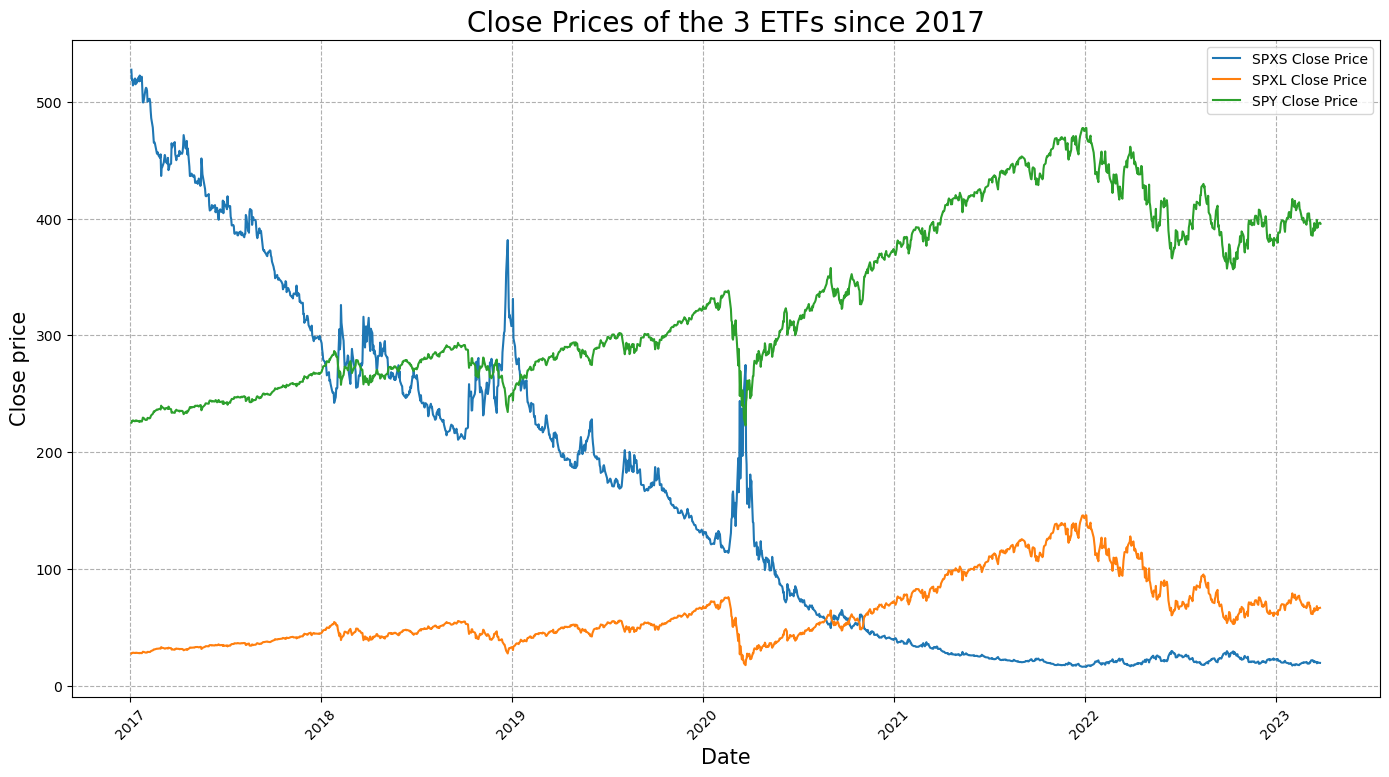

In [100]:
fig, ax = plt.subplots(1, 1)
ax.plot(dataSPXS_close, label ='SPXS Close Price')
ax.plot(dataSPXL_close, label ='SPXL Close Price')
ax.plot(dataSPY_close, label ='SPY Close Price')

ax.set_xlabel('Date',fontsize=15)
ax.tick_params(axis='x', rotation=45,)
ax.set_ylabel('Close price',fontsize=15)
ax.legend()
plt.title("Close Prices of the 3 ETFs since 2017")
ax.grid(axis='x', linestyle='--')
ax.grid(axis='y', linestyle='--')
fig.tight_layout() 
plt.show()

Tips pour le projet:
for plots : plotly
Pt= exp(sum(ui), thus lnPi-lnPi-1 = ui


In [101]:
dataSPXS_close_log_ret=np.log(dataSPXS_close).pct_change()#OR =(data_close - data_close.shift(1))/data_close.shift(1)
dataSPXS_close_log_ret.rename(columns={dataSPXS_close_log_ret.columns[0]:'SPXS Log-Returns'},inplace=True)
dataSPXS_close_log_ret.dropna(inplace=True)

dataSPXL_close_log_ret=np.log(dataSPXL_close).pct_change()
dataSPXL_close_log_ret.rename(columns={dataSPXL_close_log_ret.columns[0]:'SPXL Log-Returns'},inplace=True)
dataSPXL_close_log_ret.dropna(inplace=True)

dataSPY_close_log_ret=np.log(dataSPY_close).pct_change()
dataSPY_close_log_ret.rename(columns={dataSPY_close_log_ret.columns[0]:'SPY Log-Returns'},inplace=True)
dataSPY_close_log_ret.dropna(inplace=True)

data_log_returns=pd.concat([dataSPXS_close_log_ret,dataSPXL_close_log_ret,dataSPY_close_log_ret],axis=1)
data_log_returns





,SPXS Log-Returns,SPXL Log-Returns,SPY Log-Returns
Date,,,
2017-01-04,-0.002592,0.005300,0.001095
2017-01-05,0.000154,-0.000698,-0.000147
2017-01-06,-0.001702,0.003368,0.000659
2017-01-09,0.001396,-0.002848,-0.000609
2017-01-10,0.000462,-0.000268,0.000000
...,...,...,...
2023-03-22,0.016760,-0.012173,-0.002871
2023-03-23,-0.001829,0.001294,0.000452
2023-03-24,-0.006408,0.004669,0.001095


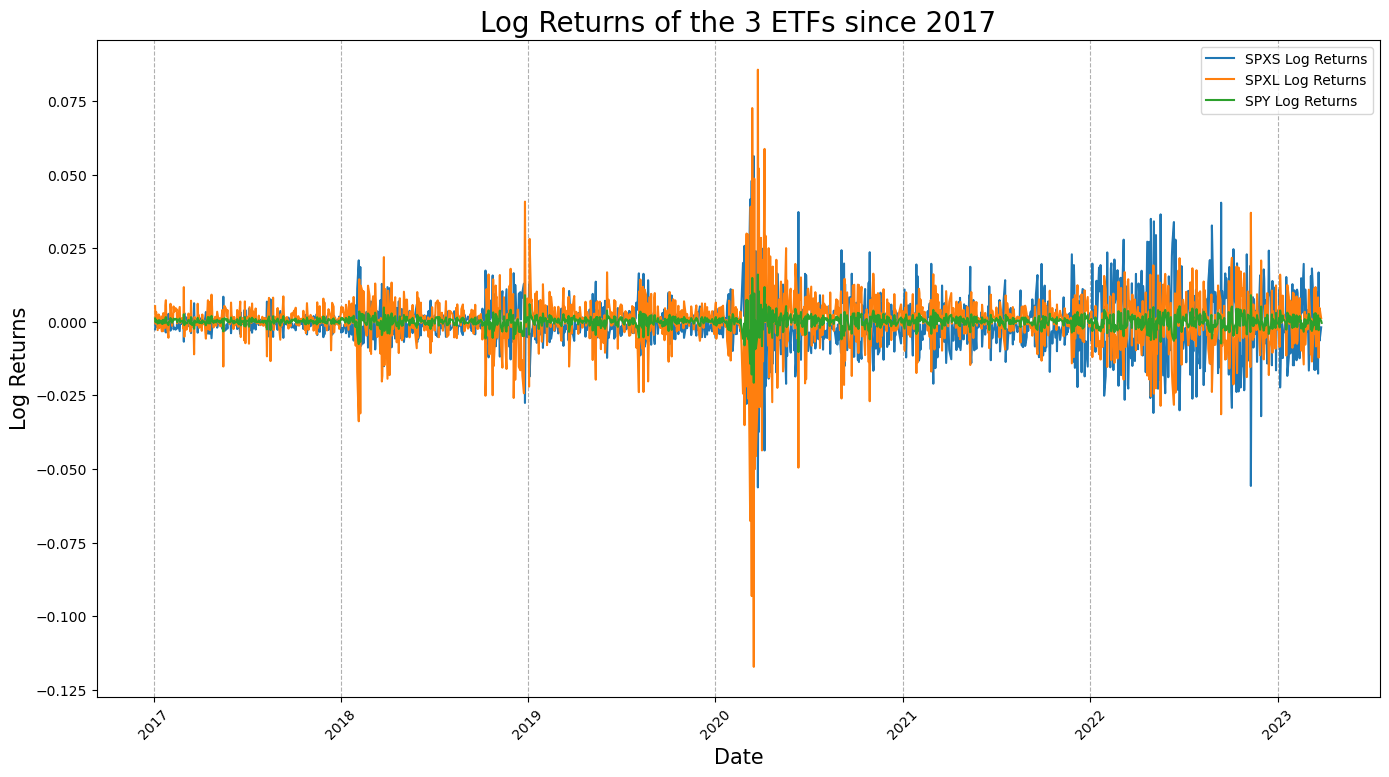

In [102]:
fig, ax = plt.subplots(1, 1)
ax.plot(dataSPXS_close_log_ret, label ='SPXS Log Returns')
ax.plot(dataSPXL_close_log_ret, label ='SPXL Log Returns')
ax.plot(dataSPY_close_log_ret, label ='SPY Log Returns')

ax.set_xlabel('Date',fontsize=15)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Log Returns',fontsize=15)
ax.legend()
plt.title("Log Returns of the 3 ETFs since 2017",fontsize=20)
ax.grid(axis='x', linestyle='--')
fig.tight_layout() 
plt.show()

##  Some statistics on annualised Log-Returns

In [103]:
annualised_stats = data_log_returns.resample('Y').agg(['mean','std','skew'])
annualised_stats

SPXS Log-Returns                     SPXL Log-Returns            \
                       mean       std      skew             mean       std   
Date                                                                         
2017-12-31        -0.000376  0.002066  0.358143         0.000544  0.003556   
2018-12-31         0.000035  0.005694  0.232023        -0.000289  0.008659   
2019-12-31        -0.000622  0.004401  0.531389         0.000742  0.006200   
2020-12-31        -0.001052  0.012918 -0.002549         0.000259  0.018656   
2021-12-31        -0.001046  0.007590  0.249828         0.000604  0.005333   
2022-12-31         0.000525  0.014707 -0.137040        -0.000680  0.010459   
2023-12-31        -0.000705  0.010683  0.011335         0.000319  0.007450   

                     SPY Log-Returns                      
                skew            mean       std      skew  
Date                                                      
2017-12-31 -0.538835        0.000124  0.000774 -0.437125  
2018-12-31 -0.484187       -0.000045  0.001938 -0.449432  
2019-12-31 -0.636612        0.000179  0.001403 -0.614127  
2020-12-31 -1.118708        0.000108  0.003781 -0.824927  
2021-12-31 -0.419530        0.000158  0.001368 -0.372062  
2022-12-31 -0.032985       -0.000139  0.002550  0.015935  
2023-12-31 -0.100751        0.000098  0.001782 -0.064318

In [104]:
Sharpe_SPXS= data_log_returns['SPXS Log-Returns'].resample('Y').mean()/data_log_returns['SPXS Log-Returns'].resample('Y').std()*np.sqrt(252)
Sharpe_SPXL= data_log_returns['SPXS Log-Returns'].resample('Y').mean()/data_log_returns['SPXL Log-Returns'].resample('Y').std()*np.sqrt(252)
Sharpe_SPY = data_log_returns['SPY Log-Returns'].resample('Y').mean()/data_log_returns['SPY Log-Returns'].resample('Y').std()*np.sqrt(252)
print('Annualised Sharpe Ratio of the SPXS :',Sharpe_SPXS)
print('Annualised Sharpe Ratio of the SPXL :',Sharpe_SPXL)
print('Annualised Sharpe Ratio of the SPY :',Sharpe_SPY)


Annualised Sharpe Ratio of the SPXS : Date
2017-12-31   -2.890433
2018-12-31    0.098079
2019-12-31   -2.243016
2020-12-31   -1.292682
2021-12-31   -2.187360
2022-12-31    0.566593
2023-12-31   -1.048008
Freq: A-DEC, Name: SPXS Log-Returns, dtype: float64
Annualised Sharpe Ratio of the SPXL : Date
2017-12-31   -1.679056
2018-12-31    0.064493
2019-12-31   -1.592144
2020-12-31   -0.895067
2021-12-31   -3.113263
2022-12-31    0.796752
2023-12-31   -1.502913
Freq: A-DEC, dtype: float64
Annualised Sharpe Ratio of the SPY : Date
2017-12-31    2.533861
2018-12-31   -0.370075
2019-12-31    2.023072
2020-12-31    0.455103
2021-12-31    1.833984
2022-12-31   -0.867306
2023-12-31    0.871048
Freq: A-DEC, Name: SPY Log-Returns, dtype: float64


In [95]:
type(Sharpe_SPY)
df=[]
df.append(Sharpe_SPXS)
df.append(Sharpe_SPXL)
df.append(Sharpe_SPY)
df
type(df)

list

## Power profiles and Gamma effects

In [ ]:
def period_return(per_ret):
    return np.prod(per_ret + 1)- 1

In [112]:
per_ret_SPXS=dataSPXS_close.pct_change()
rolling_SPXS= per_ret_SPXS.rolling('360D').apply(period_return)
rolling_returns['Rolling 1Y Returns SPXS']=rolling_SPXS.mul(100)

per_ret_SPXL=dataSPXL_close.pct_change()
rolling_SPXL= per_ret_SPXL.rolling('360D').apply(period_return)
rolling_returns['Rolling 1Y Returns SPXL']=rolling_SPXL.mul(100)

per_ret_SPY=dataSPY_close.pct_change()
rolling_SPY= per_ret_SPY.rolling('360D').apply(period_return)
rolling_returns['Rolling 1Y Returns SPY']=rolling_SPY.mul(100)

rolling_returns = rolling_returns.dropna()
rolling_returns
    

,Rolling 1Y Returns SPXS,Rolling 1Y Returns SPXL,Rolling 1Y Returns SPY
Date,,,
2017-01-04,-1.611374,1.772248,0.594920
2017-01-05,-1.516588,1.535945,0.515001
2017-01-06,-2.559242,2.681091,0.874623
2017-01-09,-1.706161,1.708629,0.541645
2017-01-10,-1.421801,1.617737,0.541645
...,...,...,...
2023-03-21,9.064982,-43.554673,-11.880094
2023-03-22,14.595204,-46.381496,-13.382230
2023-03-23,16.288533,-47.237323,-13.761486


<Axes: xlabel='Rolling 1Y Returns SPY'>

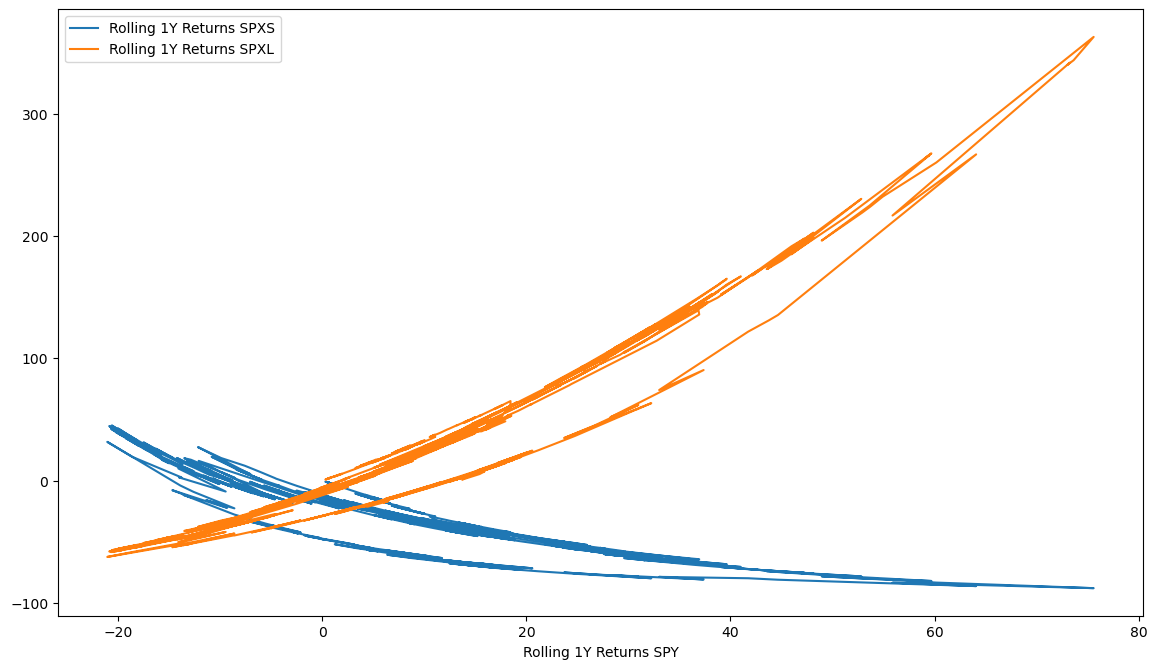

In [116]:
rolling_returns.plot ( x = 'Rolling 1Y Returns SPY', y = ['Rolling 1Y Returns SPXS','Rolling 1Y Returns SPXL'])

In [120]:
def ratio(SP, l, T):
    somme = 0 
    for i in range (0,T):
        somme = somme + (l**2 - l)*(np.var(SP[i]))*i
        ratio = ((SP[T]/(SP[0]))**l)*np.exp(-0.5*somme)
    return ratio


In [121]:
SP = rolling_returns['Rolling 1Y Returns SPXS']
l = 3
T = 252
ratio(SP, l, T)

23793.137346820433

In [131]:
def utility_SPXS(l,T):
    somme = 0
    for i in range(0,T):
        somme+= 1 
    print(sommme)
    utility = ((rolling_returns['Rolling 1Y Returns SPY'])**l)*np.exp(-0.5*(l**2 - l)*integral)
    return utility 
    

In [134]:
utility_SPXS(3,22)

22


Date
2017-01-04    4.570241e-30
2017-01-05    2.964758e-30
2017-01-06    1.452204e-29
2017-01-09    3.449127e-30
2017-01-10    3.449127e-30
                  ...     
2023-03-21   -3.639350e-26
2023-03-22   -5.201752e-26
2023-03-23   -5.656661e-26
2023-03-24   -6.289055e-26
2023-03-27   -4.197883e-26
Name: Rolling 1Y Returns SPY, Length: 1567, dtype: float64